In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import scipy as sp
import math
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
#import contractions
import unicodedata
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest
from matplotlib import rcParams
import xlrd
import csv  
import os

In [2]:
f_1 = open(os.path.expanduser('~/Downloads/mercari/test.tsv'))

In [3]:
f_2 = open(os.path.expanduser('~/Downloads/mercari/train.tsv'))

In [4]:
df_1 = pd.read_csv(f_1, sep="\t")

In [5]:
df_1.columns

Index(['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'shipping', 'item_description'],
      dtype='object')

In [6]:
df_1.dtypes

test_id               int64
name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object

In [7]:
df_1.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material ..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and perfect for hot weather
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. ❤ ❤ Bundle and save! ❤ ❤ Book, death, grief, bereavement SHLF.SW.5.15"


In [8]:
df_1 = df_1.drop(['test_id'], axis=1)

In [9]:
df_1.head()

,name,item_condition_id,category_name,brand_name,shipping,item_description
0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined with bubble wrap for protection Self Sealing (peel-and-seal), adhesive keeps contents secure and tamper proof Durable and lightweight Kraft material ..."
2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coach outlet.
3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and perfect for hot weather
4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,"Rediscovering life after the loss of a loved one by Tony Cooke. Paperback in good condition 2003. ❤ ❤ Bundle and save! ❤ ❤ Book, death, grief, bereavement SHLF.SW.5.15"


In [10]:
df_1.describe()

,item_condition_id,shipping
count,693359.000000,693359.000000
mean,1.906102,0.447719
std,0.903378,0.497260
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,5.000000,1.000000


In [11]:
df_1.shape

(693359, 6)

# Train set 

+ This set has a price attribute. 

In [12]:
df_2 = pd.read_csv(f_2, sep="\t")

In [13]:
df_2.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [14]:
df_2.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [15]:
df_2.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [16]:
df_2 = df_2.drop(['train_id'], axis=1)


In [17]:
df_2.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & Parts,Razer,52.0,0,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!"
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [18]:
df_2.describe()

,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06
mean,1.907380e+00,2.673752e+01,4.472744e-01
std,9.031586e-01,3.858607e+01,4.972124e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+01,0.000000e+00
50%,2.000000e+00,1.700000e+01,0.000000e+00
75%,3.000000e+00,2.900000e+01,1.000000e+00
max,5.000000e+00,2.009000e+03,1.000000e+00


In [19]:
df_2.shape

(1482535, 7)

In [20]:
df_2.columns

Index(['name', 'item_condition_id', 'category_name', 'brand_name', 'price',
       'shipping', 'item_description'],
      dtype='object')

In [21]:
1482535 + 693359

2175894

In [22]:
df = df_2.append(df_1)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [23]:
df.shape

(2175894, 7)

In [24]:
df

,brand_name,category_name,item_condition_id,item_description,name,price,shipping
0,NaN,Men/Tops/T-shirts,3,No description yet,MLB Cincinnati Reds T Shirt Size XL,10.0,1
1,Razer,Electronics/Computers & Tablets/Components & Parts,3,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Razer BlackWidow Chroma Keyboard,52.0,0
2,Target,Women/Tops & Blouses/Blouse,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",AVA-VIV Blouse,10.0,1
3,NaN,Home/Home Décor/Home Décor Accents,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Leather Horse Statues,35.0,1
4,NaN,Women/Jewelry/Necklaces,1,Complete with certificate of authenticity,24K GOLD plated rose,44.0,0
5,NaN,Women/Other/Other,3,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Bundled items requested for Ruie,59.0,0
6,Acacia Swimwear,Women/Swimwear/Two-Piece,3,"Size small but straps slightly shortened to fit xs, besides that, perfect condition",Acacia pacific tides santorini top,64.0,0
7,Soffe,Sports & Outdoors/Apparel/Girls,3,You get three pairs of Sophie cheer shorts size small and medium girls and two sports bra/boy shorts spandex matching sets in small and medium girls. All items total retail for [rm] in store and y...,Girls cheer and tumbling bundle of 7,6.0,1
8,Nike,Sports & Outdoors/Apparel/Girls,3,Girls Size small Plus green. Three shorts total.,Girls Nike Pro shorts,19.0,0
9,NaN,Vintage & Collectibles/Collectibles/Doll,3,"I realized his pants are on backwards after the picture. They were very dirty so I hand washed them. He has a stuffed body and painted porcelain head, hands and feet. Back before clowns were too s...",Porcelain clown doll checker pants VTG,8.0,0


In [25]:
list(df)

['brand_name',
 'category_name',
 'item_condition_id',
 'item_description',
 'name',
 'price',
 'shipping']

In [26]:
df.columns

Index(['brand_name', 'category_name', 'item_condition_id', 'item_description',
       'name', 'price', 'shipping'],
      dtype='object')

In [27]:
df = df.reset_index(drop=True)

In [28]:
df


,brand_name,category_name,item_condition_id,item_description,name,price,shipping
0,NaN,Men/Tops/T-shirts,3,No description yet,MLB Cincinnati Reds T Shirt Size XL,10.0,1
1,Razer,Electronics/Computers & Tablets/Components & Parts,3,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Razer BlackWidow Chroma Keyboard,52.0,0
2,Target,Women/Tops & Blouses/Blouse,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",AVA-VIV Blouse,10.0,1
3,NaN,Home/Home Décor/Home Décor Accents,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Leather Horse Statues,35.0,1
4,NaN,Women/Jewelry/Necklaces,1,Complete with certificate of authenticity,24K GOLD plated rose,44.0,0
5,NaN,Women/Other/Other,3,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Bundled items requested for Ruie,59.0,0
6,Acacia Swimwear,Women/Swimwear/Two-Piece,3,"Size small but straps slightly shortened to fit xs, besides that, perfect condition",Acacia pacific tides santorini top,64.0,0
7,Soffe,Sports & Outdoors/Apparel/Girls,3,You get three pairs of Sophie cheer shorts size small and medium girls and two sports bra/boy shorts spandex matching sets in small and medium girls. All items total retail for [rm] in store and y...,Girls cheer and tumbling bundle of 7,6.0,1
8,Nike,Sports & Outdoors/Apparel/Girls,3,Girls Size small Plus green. Three shorts total.,Girls Nike Pro shorts,19.0,0
9,NaN,Vintage & Collectibles/Collectibles/Doll,3,"I realized his pants are on backwards after the picture. They were very dirty so I hand washed them. He has a stuffed body and painted porcelain head, hands and feet. Back before clowns were too s...",Porcelain clown doll checker pants VTG,8.0,0


In [29]:
df.shape

(2175894, 7)

In [30]:
df.dtypes


brand_name            object
category_name         object
item_condition_id      int64
item_description      object
name                  object
price                float64
shipping               int64
dtype: object

In [31]:
df['category_name'].unique()

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ..., 'Handmade/Housewares/Rugs',
       'Vintage & Collectibles/Accessories/Shawl', 'Handmade/Toys/Baby'],
      dtype=object)

In [35]:
len(df['category_name'].unique())

1311

In [32]:
df['brand_name'].unique()

array([nan, 'Razer', 'Target', ..., 'Pam Grace Creations', 'TC',
       'PediaCare'], dtype=object)

In [33]:
len(df['brand_name'].unique())

5290

In [36]:
df['item_condition_id'].unique()

array([3, 1, 2, 4, 5])

In [38]:
len(df['item_condition_id'].unique())

5

In [39]:
df['shipping'].unique()

array([1, 0])

In [40]:
df['price'].unique()

array([  10. ,   52. ,   35. ,   44. ,   59. ,   64. ,    6. ,   19. ,
          8. ,   34. ,   16. ,    4. ,   43. ,   11. ,   29. ,   25. ,
         27. ,   13. ,   20. ,  386. ,   66. ,   24. ,    5. ,   32. ,
         50. ,   22. ,  209. ,  226. ,   14. ,   12. ,   51. ,   21. ,
         54. ,    9. ,  114. ,   36. ,   28. ,    7. ,  119. ,   15. ,
         45. ,   61. ,   26. ,   17. ,   18. ,   39. ,    3. ,  150. ,
         81. ,   49. ,   41. ,   38. ,   31. ,   60. ,   40. ,  250. ,
         79. ,  104. ,  145. ,   23. ,   91. ,   47. ,   30. ,   46. ,
         71. ,   55. ,   70. ,  470. ,  129. ,   94. ,  109. ,   56. ,
         80. ,  650. ,  124. ,   42. ,  131. ,   69. ,   76. ,   33. ,
        106. ,  165. ,  100. ,   74. ,  506. ,   95. ,  271. ,  140. ,
         73. ,   65. ,  120. ,   62. ,   37. ,  116. ,   75. ,   90. ,
        115. ,   84. ,  589. ,  155. ,  249. ,  304. ,   72. ,   89. ,
         68. ,  350. ,  136. ,  110. ,  134. ,   86. ,   57. ,  186. ,
      

In [41]:
len(df['price'].unique())

829

In [ ]:
df[] = [incom for incom in incoms if str(incom) != 'nan']


df2[df2['usefulCount']!= 0].head(20)

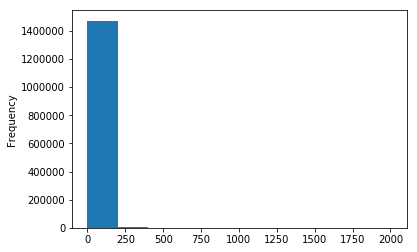

In [45]:
df['price'].plot(kind = 'hist')

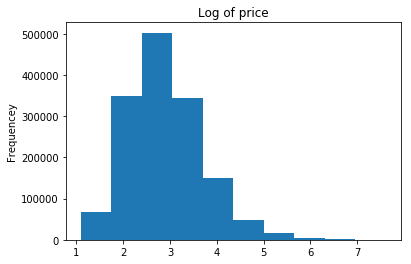

In [52]:
plt.hist(np.log(df['price'][df['price'] != 0])) #when in doubt take a log! lol 
                                                            # and it's a normal distribution!
    # the usegful count by itself is very skewed but the log tranform of it makes it noraml distributed
plt.title("Log of price")
#plt.xlabel("useful counts of a review") 
plt.ylabel("Frequencey")
plt.show()


In [54]:
df['category_name'].unique()

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ..., 'Handmade/Housewares/Rugs',
       'Vintage & Collectibles/Accessories/Shawl', 'Handmade/Toys/Baby'],
      dtype=object)

In [56]:
df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings                 88077
Women/Tops & Blouses/T-Shirts                                  68082
Beauty/Makeup/Face                                             50352
Beauty/Makeup/Lips                                             44028
Electronics/Video Games & Consoles/Games                       39178
Beauty/Makeup/Eyes                                             37191
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    36086
Women/Underwear/Bras                                           31351
Women/Tops & Blouses/Tank, Cami                                29911
Women/Tops & Blouses/Blouse                                    29812
Women/Dresses/Above Knee, Mini                                 29582
Women/Jewelry/Necklaces                                        28926
Women/Athletic Apparel/Shorts                                  28768
Beauty/Makeup/Makeup Palettes                                  27995
Women/Shoes/Boots                 

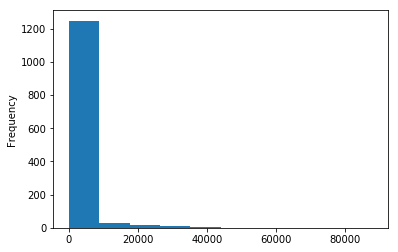

In [58]:
df['category_name'].value_counts().plot(kind = 'hist')

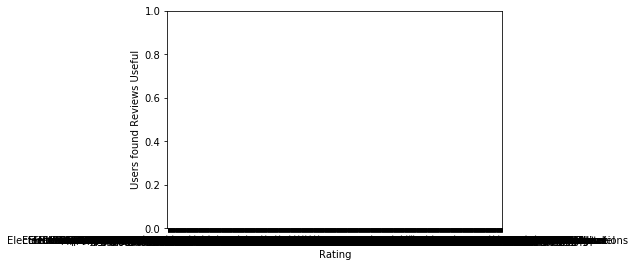

In [59]:
sns.violinplot( y = df['category_name'].value_counts(), x= df['category_name'])
plt.xlabel('Rating')
plt.ylabel('Users found Reviews Useful')
plt.show()

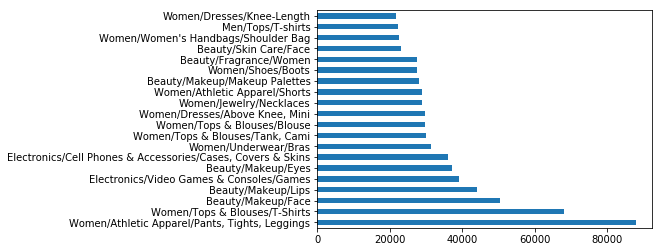

In [60]:
df['category_name'].value_counts()[:20].plot(kind='barh')  

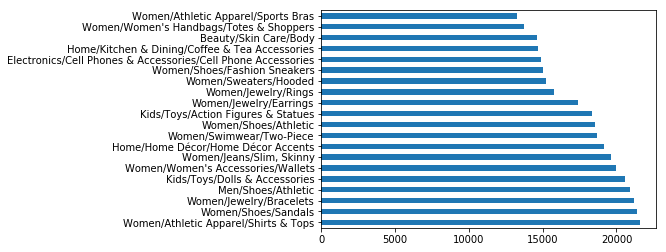

In [61]:
df['category_name'].value_counts()[20:40].plot(kind='barh')  

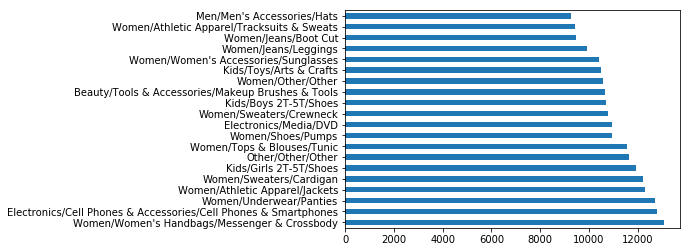

In [62]:
df['category_name'].value_counts()[40:60].plot(kind='barh')  

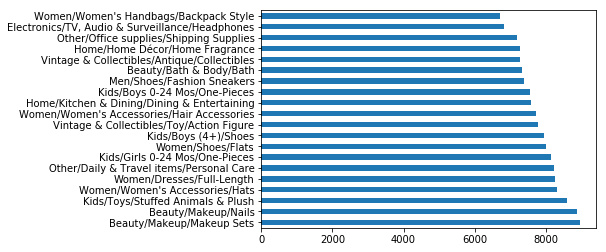

In [63]:
df['category_name'].value_counts()[60:80].plot(kind='barh')  

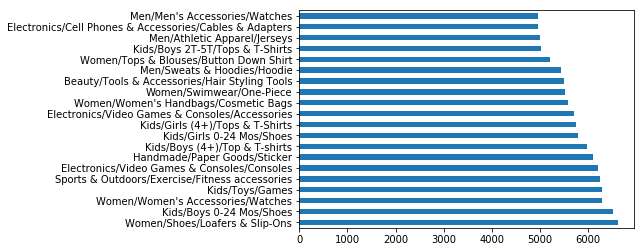

In [64]:
df['category_name'].value_counts()[80:100].plot(kind='barh')  

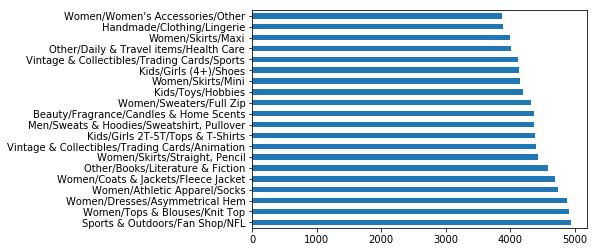

In [65]:
df['category_name'].value_counts()[100:120].plot(kind='barh')  

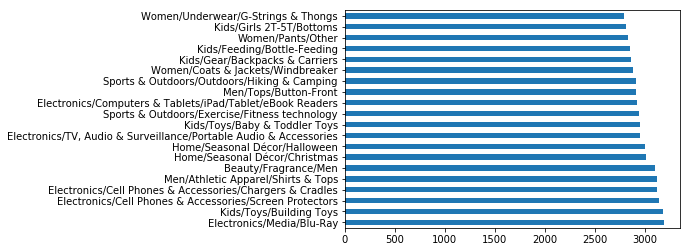

In [66]:
df['category_name'].value_counts()[140:160].plot(kind='barh')  

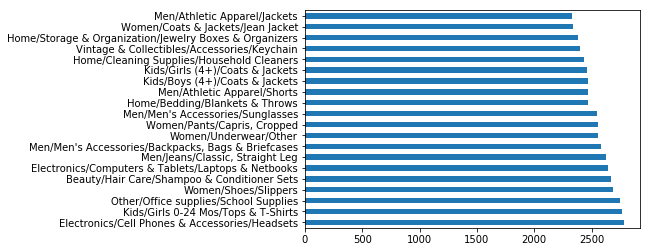

In [67]:
df['category_name'].value_counts()[160:180].plot(kind='barh')  

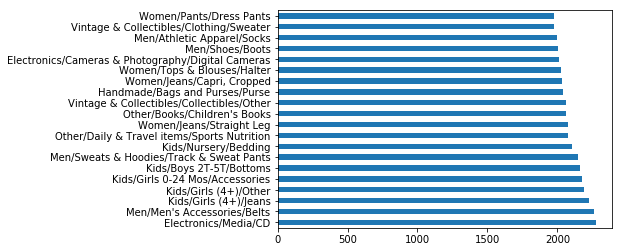

In [68]:
df['category_name'].value_counts()[180:200].plot(kind='barh')  

In [69]:
df.size

15231258

In [70]:
df

,brand_name,category_name,item_condition_id,item_description,name,price,shipping
0,NaN,Men/Tops/T-shirts,3,No description yet,MLB Cincinnati Reds T Shirt Size XL,10.0,1
1,Razer,Electronics/Computers & Tablets/Components & Parts,3,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Razer BlackWidow Chroma Keyboard,52.0,0
2,Target,Women/Tops & Blouses/Blouse,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",AVA-VIV Blouse,10.0,1
3,NaN,Home/Home Décor/Home Décor Accents,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Leather Horse Statues,35.0,1
4,NaN,Women/Jewelry/Necklaces,1,Complete with certificate of authenticity,24K GOLD plated rose,44.0,0
5,NaN,Women/Other/Other,3,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Bundled items requested for Ruie,59.0,0
6,Acacia Swimwear,Women/Swimwear/Two-Piece,3,"Size small but straps slightly shortened to fit xs, besides that, perfect condition",Acacia pacific tides santorini top,64.0,0
7,Soffe,Sports & Outdoors/Apparel/Girls,3,You get three pairs of Sophie cheer shorts size small and medium girls and two sports bra/boy shorts spandex matching sets in small and medium girls. All items total retail for [rm] in store and y...,Girls cheer and tumbling bundle of 7,6.0,1
8,Nike,Sports & Outdoors/Apparel/Girls,3,Girls Size small Plus green. Three shorts total.,Girls Nike Pro shorts,19.0,0
9,NaN,Vintage & Collectibles/Collectibles/Doll,3,"I realized his pants are on backwards after the picture. They were very dirty so I hand washed them. He has a stuffed body and painted porcelain head, hands and feet. Back before clowns were too s...",Porcelain clown doll checker pants VTG,8.0,0


In [74]:
df['category_name'].value_counts().head(50)

Women/Athletic Apparel/Pants, Tights, Leggings                     88077
Women/Tops & Blouses/T-Shirts                                      68082
Beauty/Makeup/Face                                                 50352
Beauty/Makeup/Lips                                                 44028
Electronics/Video Games & Consoles/Games                           39178
Beauty/Makeup/Eyes                                                 37191
Electronics/Cell Phones & Accessories/Cases, Covers & Skins        36086
Women/Underwear/Bras                                               31351
Women/Tops & Blouses/Tank, Cami                                    29911
Women/Tops & Blouses/Blouse                                        29812
Women/Dresses/Above Knee, Mini                                     29582
Women/Jewelry/Necklaces                                            28926
Women/Athletic Apparel/Shorts                                      28768
Beauty/Makeup/Makeup Palettes                      

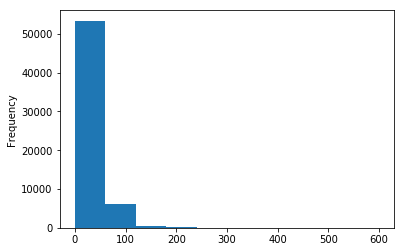

In [75]:
df[df['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'].plot(kind = 'hist')


In [76]:
df[df['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'].max()

600.0

In [77]:
df[df['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'].describe()

count    60177.000000
mean        34.392733
std         24.404239
min          0.000000
25%         18.000000
50%         29.000000
75%         44.000000
max        600.000000
Name: price, dtype: float64

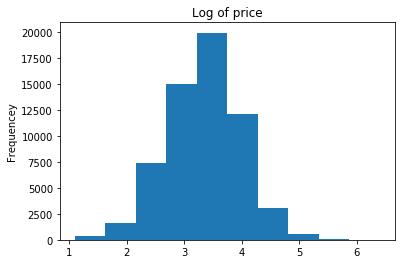

In [80]:
plt.hist(np.log(df[df['category_name'] == 'Women/Athletic Apparel/Pants, Tights, Leggings']['price'][df['price'] != 0])) #when in doubt take a log! lol 
                                                            # and it's a normal distribution!
    #the log tranform of it makes it noraml distributed
plt.title("Log of price")
#plt.xlabel("useful counts of a review") 
plt.ylabel("Frequencey")
plt.show()


In [81]:
df['item_condition_id'].value_counts()

1    940630
3    633834
2    551032
4     46815
5      3583
Name: item_condition_id, dtype: int64

# Item Condition ID runs from New (1) down to 5

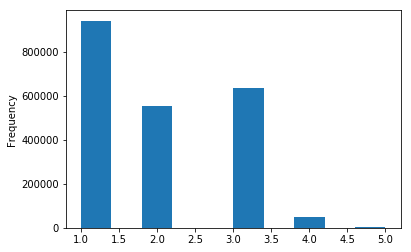

In [83]:
df['item_condition_id'].plot(kind = 'hist')

In [84]:
df['item_condition_id'].dtypes

dtype('int64')

In [86]:
df[df['item_condition_id'] == 1]['price']

2          10.0
3          35.0
4          44.0
11         34.0
13          4.0
15         11.0
16          6.0
17         29.0
18         25.0
21         20.0
23          8.0
26         13.0
30         32.0
31         50.0
32         22.0
33         10.0
35         13.0
40         20.0
42         14.0
43         12.0
46          8.0
49          9.0
51         36.0
52         28.0
54         21.0
56         14.0
58         10.0
59         12.0
61         50.0
65         13.0
           ... 
2175823     NaN
2175824     NaN
2175825     NaN
2175829     NaN
2175830     NaN
2175832     NaN
2175835     NaN
2175836     NaN
2175841     NaN
2175842     NaN
2175844     NaN
2175849     NaN
2175854     NaN
2175855     NaN
2175856     NaN
2175860     NaN
2175863     NaN
2175871     NaN
2175874     NaN
2175875     NaN
2175877     NaN
2175879     NaN
2175882     NaN
2175883     NaN
2175884     NaN
2175885     NaN
2175886     NaN
2175889     NaN
2175890     NaN
2175891     NaN
Name: price, Length: 940

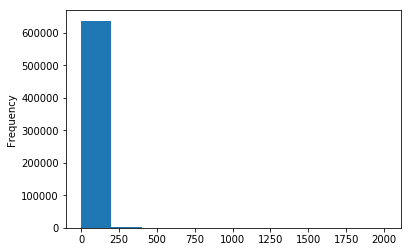

In [89]:
df[df['item_condition_id'] == 1]['price'].plot(kind = 'hist')

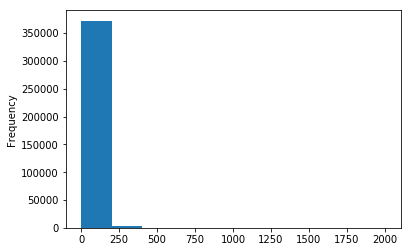

In [90]:
df[df['item_condition_id'] == 2]['price'].plot(kind = 'hist')

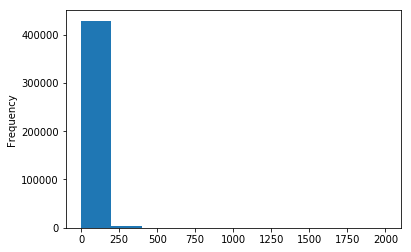

In [91]:
df[df['item_condition_id'] == 3]['price'].plot(kind = 'hist')

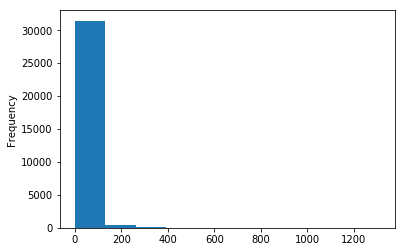

In [92]:
df[df['item_condition_id'] == 4]['price'].plot(kind = 'hist')

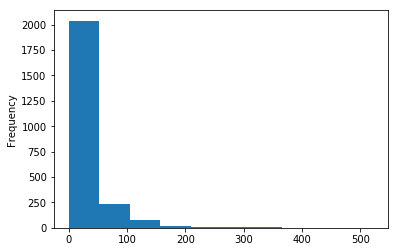

In [94]:
df[df['item_condition_id'] == 5]['price'].plot(kind = 'hist')

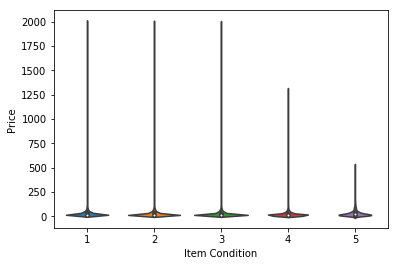

In [97]:
sns.violinplot( y = df.price, x= df['item_condition_id'])
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.show()

In [99]:
df['item_condition_id']['price'].describe()

count    2.175894e+06
mean     1.906973e+00
std      9.032285e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: item_condition_id, dtype: float64

In [100]:
df[df['item_condition_id'] == 1]['price'].describe()

count    640549.000000
mean         26.486967
std          35.418024
min           0.000000
25%          10.000000
50%          18.000000
75%          30.000000
max        2009.000000
Name: price, dtype: float64

In [101]:
df[df['item_condition_id'] == 2]['price'].describe()

count    375479.000000
mean         27.563225
std          42.125698
min           0.000000
25%          11.000000
50%          17.000000
75%          29.000000
max        2004.000000
Name: price, dtype: float64

In [102]:
df[df['item_condition_id'] == 3]['price'].describe()

count    432161.000000
mean         26.540711
std          40.030681
min           0.000000
25%          11.000000
50%          16.000000
75%          28.000000
max        2000.000000
Name: price, dtype: float64

In [103]:
df[df['item_condition_id'] == 4]['price'].describe()

count    31962.000000
mean        24.349212
std         35.679148
min          0.000000
25%         10.000000
50%         15.000000
75%         26.000000
max       1309.000000
Name: price, dtype: float64

In [104]:
df[df['item_condition_id'] == 5]['price'].describe()

count    2384.000000
mean       31.703859
std        39.531069
min         0.000000
25%        11.000000
50%        19.000000
75%        35.250000
max       522.000000
Name: price, dtype: float64

In [105]:
df.price.value_counts()

10.0      99416
12.0      78986
14.0      76655
16.0      66413
9.0       63643
8.0       61564
15.0      58082
20.0      56323
7.0       52268
18.0      41243
24.0      40797
11.0      39786
19.0      37729
13.0      36800
26.0      33531
25.0      32450
6.0       32260
5.0       31502
21.0      28996
22.0      28012
30.0      25386
29.0      21793
17.0      21334
34.0      18816
36.0      18718
3.0       18703
31.0      17414
40.0      16545
4.0       16139
35.0      15943
          ...  
941.0         1
820.0         1
929.0         1
917.0         1
1909.0        1
899.0         1
895.0         1
894.0         1
890.0         1
1999.0        1
881.0         1
2004.0        1
874.0         1
870.0         1
865.0         1
860.0         1
859.0         1
851.0         1
2006.0        1
848.0         1
840.0         1
837.0         1
836.0         1
835.0         1
834.0         1
2009.0        1
829.0         1
826.0         1
824.0         1
771.0         1
Name: price, Length: 828

In [107]:
len(df[df['price'] < 250.0])

1476089

In [113]:
len(df[df['price'] < 100.0])

1438222

In [114]:
df_price = df[df['price'] < 100.0]

In [115]:
df_price

,brand_name,category_name,item_condition_id,item_description,name,price,shipping
0,NaN,Men/Tops/T-shirts,3,No description yet,MLB Cincinnati Reds T Shirt Size XL,10.0,1
1,Razer,Electronics/Computers & Tablets/Components & Parts,3,This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.,Razer BlackWidow Chroma Keyboard,52.0,0
2,Target,Women/Tops & Blouses/Blouse,1,"Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!",AVA-VIV Blouse,10.0,1
3,NaN,Home/Home Décor/Home Décor Accents,1,New with tags. Leather horses. Retail for [rm] each. Stand about a foot high. They are being sold as a pair. Any questions please ask. Free shipping. Just got out of storage,Leather Horse Statues,35.0,1
4,NaN,Women/Jewelry/Necklaces,1,Complete with certificate of authenticity,24K GOLD plated rose,44.0,0
5,NaN,Women/Other/Other,3,"Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.",Bundled items requested for Ruie,59.0,0
6,Acacia Swimwear,Women/Swimwear/Two-Piece,3,"Size small but straps slightly shortened to fit xs, besides that, perfect condition",Acacia pacific tides santorini top,64.0,0
7,Soffe,Sports & Outdoors/Apparel/Girls,3,You get three pairs of Sophie cheer shorts size small and medium girls and two sports bra/boy shorts spandex matching sets in small and medium girls. All items total retail for [rm] in store and y...,Girls cheer and tumbling bundle of 7,6.0,1
8,Nike,Sports & Outdoors/Apparel/Girls,3,Girls Size small Plus green. Three shorts total.,Girls Nike Pro shorts,19.0,0
9,NaN,Vintage & Collectibles/Collectibles/Doll,3,"I realized his pants are on backwards after the picture. They were very dirty so I hand washed them. He has a stuffed body and painted porcelain head, hands and feet. Back before clowns were too s...",Porcelain clown doll checker pants VTG,8.0,0


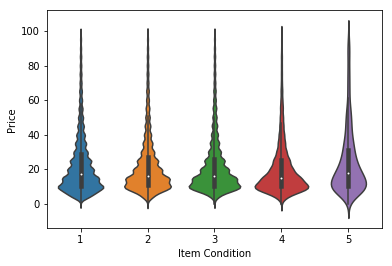

In [116]:
sns.violinplot( y = df_price.price , x= df['item_condition_id'])
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.show()

In [118]:
df['price'].sort_values(ascending=False)

760469     2009.0
1262245    2006.0
1393600    2004.0
1445348    2000.0
742113     2000.0
778940     2000.0
1250053    2000.0
415027     2000.0
956343     2000.0
952000     1999.0
180749     1909.0
194639     1900.0
182847     1850.0
1267555    1850.0
244054     1815.0
1227002    1815.0
449729     1808.0
645320     1806.0
607957     1806.0
897423     1800.0
1163903    1800.0
667668     1800.0
1024458    1770.0
145696     1759.0
1416120    1750.0
596178     1747.0
506623     1709.0
1468729    1708.0
379231     1700.0
229506     1625.0
            ...  
2175864       NaN
2175865       NaN
2175866       NaN
2175867       NaN
2175868       NaN
2175869       NaN
2175870       NaN
2175871       NaN
2175872       NaN
2175873       NaN
2175874       NaN
2175875       NaN
2175876       NaN
2175877       NaN
2175878       NaN
2175879       NaN
2175880       NaN
2175881       NaN
2175882       NaN
2175883       NaN
2175884       NaN
2175885       NaN
2175886       NaN
2175887       NaN
2175888   

In [119]:
df.groupby(['item_condition_id']).describe()

price                                                \
                      count       mean        std  min   25%   50%    75%   
item_condition_id                                                           
1                  640549.0  26.486967  35.418024  0.0  10.0  18.0  30.00   
2                  375479.0  27.563225  42.125698  0.0  11.0  17.0  29.00   
3                  432161.0  26.540711  40.030681  0.0  11.0  16.0  28.00   
4                   31962.0  24.349212  35.679148  0.0  10.0  15.0  26.00   
5                    2384.0  31.703859  39.531069  0.0  11.0  19.0  35.25   

                           shipping                                          \
                      max     count      mean       std  min  25%  50%  75%   
item_condition_id                                                             
1                  2009.0  940630.0  0.562704  0.496053  0.0  0.0  1.0  1.0   
2                  2004.0  551032.0  0.380334  0.485469  0.0  0.0  0.0  1.0   
3                  2000.0  633834.0  0.344079  0.475067  0.0  0.0  0.0  1.0   
4                  1309.0   46815.0  0.326519  0.468945  0.0  0.0  0.0  1.0   
5                   522.0    3583.0  0.358080  0.479503  0.0  0.0  0.0  1.0   

                        
                   max  
item_condition_id       
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  
5                  1.0

In [120]:
df.groupby(['shipping']).describe()

item_condition_id                                               \
                     count      mean       std  min  25%  50%  75%  max   
shipping                                                                  
0                1202364.0  2.061852  0.897863  1.0  1.0  2.0  3.0  5.0   
1                 973530.0  1.715688  0.872663  1.0  1.0  1.0  2.0  5.0   

             price                                                      
             count       mean       std  min   25%   50%   75%     max  
shipping                                                                
0         819435.0  30.111778  39.53592  0.0  13.0  20.0  33.0  2009.0  
1         663100.0  22.567726  36.95579  0.0   8.0  14.0  25.0  2000.0

In [123]:
len(df[df['price'] == 'NaN'])   #WEIRD!!!!

0

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175894 entries, 0 to 2175893
Data columns (total 7 columns):
brand_name           object
category_name        object
item_condition_id    int64
item_description     object
name                 object
price                float64
shipping             int64
dtypes: float64(1), int64(2), object(4)
memory usage: 116.2+ MB


In [126]:
correlation = df.corr()
correlation

,item_condition_id,price,shipping
item_condition_id,1.000000,-0.000807,-0.190563
price,-0.000807,1.000000,-0.097211
shipping,-0.190563,-0.097211,1.000000


In [ ]:
MinMaxScaler(feature_range= (0,1))  # to scale btw 0 and 1 (from scikit learn library)